In [16]:
import numpy as np                                # import packages and give them quick handles since they will be used often
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import math
%matplotlib inline

In [64]:
AirData = np.genfromtxt('power vs temp_dif data', delimiter=',',skip_header=1)
print(AirData)

[[ 0.  -1.6  0.2]
 [ 1.   0.6  0.2]
 [ 3.   4.8  0.2]
 [ 4.2  7.   0.2]]


In [65]:
power = []
temp_dif = []
err = []

for i in range(len(AirData)):
    power.append(AirData[i][0])
    temp_dif.append(AirData[i][1])
    err.append(AirData[i][2])
    
print(power)
print(temp_dif)
print(err)

[0.0, 1.0, 3.0, 4.2]
[-1.6, 0.6, 4.8, 7.0]
[0.2, 0.2, 0.2, 0.2]


Slope: 2.0554016631201826 +- 0.04646258814831406
Intercept: -1.5135734093963742 +- 0.12213564176031275


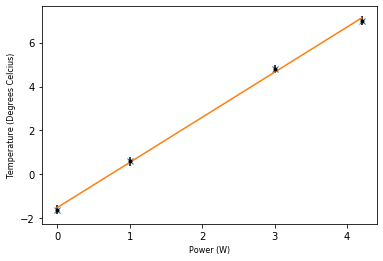

In [136]:
def func(x,m,b):                                 
    return m*x+b                                
 
initialguess = [1,1]                     
                                        
fit, covariance = optimize.curve_fit(            
        func,                                    
        power,                                  
        temp_dif,
        initialguess,
        err)   

print("Slope:",fit[0],"+-",np.sqrt(covariance[0][0]))    
print("Intercept:",fit[1],"+-",np.sqrt(covariance[1][1])) 

powerfit=np.linspace(min(power), max(power), 100) 
func_plot=func(powerfit,*fit)    

plt.xlabel('Power (W)',fontsize = 8)
plt.ylabel('Temperature (Degrees Celcius)',fontsize = 8)

plt.plot(power,temp_dif,'x')
plt.errorbar(power, temp_dif, err, fmt='k.')

plt.plot(powerfit, func_plot) 


In [66]:
# The slope of our line is a constant (see manual). Solve for lambda:

b = 0.02075
a = 0.01905
L = 0.2540

conductivity = math.log(b/a)/(2*math.pi*L*fit[0])
unc = math.log(b/a)/(2*math.pi*L*(fit[0]**2))*(np.sqrt(covariance[0][0]))
print(conductivity,'+-',unc)


-0.11422202131423885 +- 0.004499079710807281


In [72]:
# GET READY TO PLOT PRESSURE AND TEMP

PressureData = np.genfromtxt('Pressure csv 1.txt', delimiter=',',skip_header=1)

time = []
temp = []
pressure = []
err_pres = []

for i in range(len(PressureData)):
    time.append(PressureData[i][0])
    temp.append(PressureData[i][1])
    pressure.append(PressureData[i][2])
    err_pres.append(0.4)

Slope: -0.4632255185894998 +- 0.01854000855480653
Intercept: 8.561373220487674 +- 0.2238835193612654


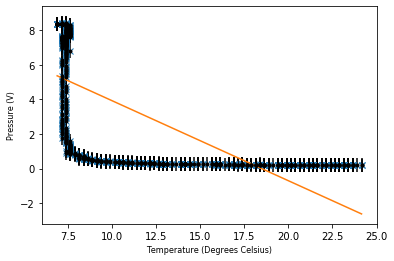

<Figure size 432x288 with 0 Axes>

In [137]:
def func2(x,m,b):                                 
    return m*x+b                                
     
initialguess2 = [-0.25,9]                     
                                        
fit, covariance = optimize.curve_fit(            
        func2,                                    
        temp,                                  
        pressure,
        initialguess2,
        err_pres)   

print("Slope:",fit[0],"+-",np.sqrt(covariance[0][0]))    
print("Intercept:",fit[1],"+-",np.sqrt(covariance[1][1])) 

tempfit=np.linspace(min(temp), max(temp), 100) 
func2_plot=func2(tempfit,*fit)    

plt.xlabel('Temperature (Degrees Celsius)',fontsize = 8)
plt.ylabel('Pressure (V)',fontsize = 8)

plt.plot(temp, pressure, 'x')
plt.errorbar(temp, pressure, err_pres, fmt='k.')
plt.plot(tempfit, func2_plot) 

plt.show()
plt.clf()

In [85]:
# The transition point occurs at approx T = 7.5

divider = 8.1

time_first = []
time_end = []
temp_first = []
temp_end = []
pressure_first = []
pressure_end = []
err_pres_first = []
err_pres_end = []

for i in range(len(time)):
    if (temp[i] < divider):
        time_first.append(time[i])
        temp_first.append(temp[i])
        pressure_first.append(pressure[i])
        err_pres_first.append(err_pres[i])    
    else:
        time_end.append(time[i])
        temp_end.append(temp[i])
        pressure_end.append(pressure[i])
        err_pres_end.append(err_pres[i])

Slope: -4.496105499336248 +- 0.5777727715657482
Intercept: 39.39717018265415 +- 4.24674628277921
Slope: -0.022977202062407446 +- 0.0008626428771833626
Intercept: 0.6578612568553344 +- 0.013548530478806659


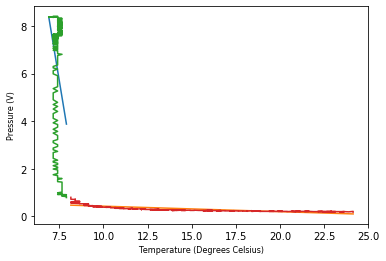

In [138]:
def func3(x,m,b):                                 
    return m*x+b                                
     
initialguess3 = [1,1]                     
                                        
fit, covariance = optimize.curve_fit(            
        func3,                                    
        temp_first,                                  
        pressure_first,
        initialguess3,
        err_pres_first)   

print("Slope:",fit[0],"+-",np.sqrt(covariance[0][0]))    
print("Intercept:",fit[1],"+-",np.sqrt(covariance[1][1]))

vert_slope = fit[0]
vert_intercept = fit[1]
vert_slope_unc = np.sqrt(covariance[0][0])
vert_intercept_unc = np.sqrt(covariance[1][1])

temp_firstfit=np.linspace(min(temp_first), max(temp_first), 100) 
func3_plot=func3(temp_firstfit,*fit)    
plt.plot(temp_firstfit, func3_plot) 

def func4(x,m,b):                                 
    return m*x+b                                
     
initialguess4 = [1,1]                     
                                        
fit, covariance = optimize.curve_fit(            
        func4,                                    
        temp_end,                                  
        pressure_end,
        initialguess4,
        err_pres_end)   

print("Slope:",fit[0],"+-",np.sqrt(covariance[0][0]))    
print("Intercept:",fit[1],"+-",np.sqrt(covariance[1][1])) 

horz_slope = fit[0]
horz_intercept = fit[1]
horz_slope_unc = np.sqrt(covariance[0][0])
horz_intercept_unc = np.sqrt(covariance[1][1])

temp_endfit=np.linspace(min(temp_end), max(temp_end), 100) 
func4_plot=func4(temp_endfit,*fit)    
plt.plot(temp_endfit, func4_plot) 

plt.xlabel('Temperature (Degrees Celsius)',fontsize = 8)
plt.ylabel('Pressure (V)',fontsize = 8)
#plt.errorbar(temp_first, pressure_first, err_pres_first, fmt='k.')
#plt.errorbar(temp_end, pressure_end, err_pres_end, fmt='k.')

plt.plot(temp_first,pressure_first)
plt.plot(temp_end,pressure_end)

plt.show()

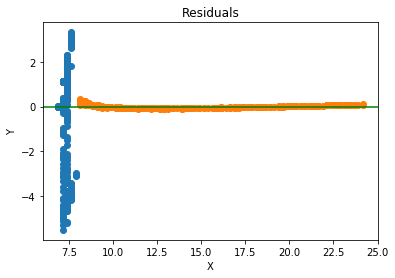

In [126]:
# Calculating residuals 

res_first = []
res_end = []

def res_func(x,m,b):
    return m*x+b

for i in range(len(temp_first)):
    res_first.append(pressure_first[i]-res_func(temp_first[i], vert_slope, vert_intercept))
    
for i in range(len(temp_end)):
    res_end.append(pressure_end[i]-res_func(temp_end[i], horz_slope, horz_intercept))
    
plt.title('Residuals')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(temp_first,res_first,'o')
plt.plot(temp_end,res_end,'o')
plt.axhline(y=0.0, color='g', linestyle='-') 
plt.show()

In [130]:
# Calculating POI

POI = (horz_intercept-vert_intercept)/(vert_slope-horz_slope)
POI_unc = abs((horz_intercept_unc+vert_slope_unc)/(vert_slope-horz_slope)) + abs((horz_intercept-vert_intercept)*(horz_slope_unc+vert_slope_unc)/(vert_slope-horz_slope)**2)

print('POI is ',POI,'+-',POI_unc)

POI is  8.660451109664928 +- 1.2524937016813862


In [135]:
# CONVERTING TO TORR

torr_lower = horz_slope*(POI+POI_unc)+horz_intercept
torr_upper = horz_slope*(POI-POI_unc)+horz_intercept

print(torr_upper, torr_lower)

torr_avg = (torr_upper+torr_lower)/2
print(torr_avg, (torr_upper-torr_avg))

0.4876471226223884 0.4300895208915366
0.4588683217569625 0.02877880086542589
